# LOGISTIC REGRESSION

Used for classification problems. More efficient than linear regression due to the use of sigmoid function which provides final value between 0 and 1. 0 and 1 are used for binary classification where the two classifications can be labelled as 1 (positive class) and 0 (negative class)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import copy

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

b = 0
w = np.zeros(X_train.shape[1])

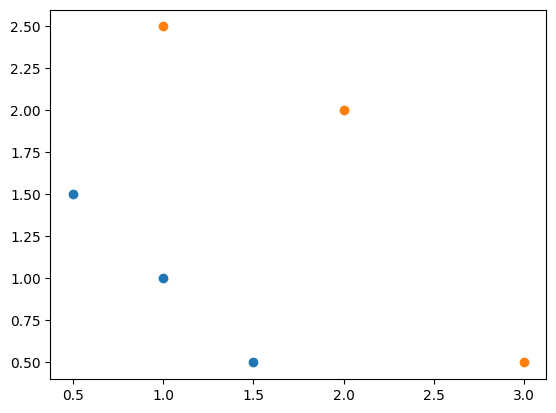

In [3]:
# Scatter data
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])

plt.show()

In [4]:
def sigmoid(z):
    sig_z = 1/(1 + math.exp(-z))

    return sig_z

In [5]:
def cost_calc(X, y, w, b):
    m = X.shape[0]
    cost = 0

    for i in range(m):
        f_x = np.dot(X[i], w) + b
        f_wb = sigmoid(f_x)
        cost += ((y[i] * math.log(f_wb)) + ((1-y[i]) * math.log(1 - f_wb)))

    cost /= (-1)/ m

    return cost

In [6]:
def gradient_calc(X, y , w, b):
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_x = np.dot(X[i], w) + b
        f_wb = sigmoid(f_x)
        dj_dw += (f_wb - y[i]) * X[i]
        dj_db += (f_wb - y[i])

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [7]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha, cost_func, grad_func):
    m = X.shape[0]
    w = copy.deepcopy(w_in)

    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = grad_func(X, y, w, b_in)

        w -= alpha * dj_dw 
        b_in -= alpha * dj_db

        if i < 100000:
            J_history.append(cost_func(X,y,w,b_in))

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration: {i: 4d} Cost: {J_history[-1]: 8.3f}")

    return w, b_in, J_history

In [13]:
iter = 1000000
alpha = 3

w_final, b_final, J_history = gradient_descent(X_train, y_train, w, b, iter, alpha, cost_calc, gradient_calc)

print(f"Final value of w: {w_final} and b: {b_final: 8.4f}")

Iteration:    0 Cost:   28.759
Iteration:  100000 Cost:    0.002
Iteration:  200000 Cost:    0.002
Iteration:  300000 Cost:    0.002
Iteration:  400000 Cost:    0.002
Iteration:  500000 Cost:    0.002
Iteration:  600000 Cost:    0.002
Iteration:  700000 Cost:    0.002
Iteration:  800000 Cost:    0.002
Iteration:  900000 Cost:    0.002
Final value of w: [15.95230117 15.75145192] and b: -43.5929
